**Step One: Prepare our films and hashtags for clustering**

In [2]:
import pandas as pd

#Set up film genres
genre_df=pd.read_csv("Top 10 Ranked Films in 2019.csv")
print("\nSample genre data :")
print(genre_df[:2])

#Seperate film genres and titles to lists
genre_list = genre_df["Genre(s)"].tolist()
film_list = genre_df["Film"].tolist()

#Do TF-IDF conversion of genres
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
genre_matrix=vectorizer.fit_transform(genre_list)
print("\n Feature names Identified :\n")
print(vectorizer.get_feature_names())


Sample genre data :
           Film            Genre(s)
0  Pain & Glory               Drama
1  The Irishman  Crime, drama, epic

 Feature names Identified :

['comedy', 'crime', 'dark', 'drama', 'epic', 'historical', 'melodrama', 'mystery', 'neo', 'noir', 'novel', 'romance', 'thriller', 'youth']


**Step Two: Try clustering TF-IDF Data**

In [4]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=3).fit(genre_matrix)

#get Cluster labels.
clusters=kmeans.labels_

#Print cluster label and film titles under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    
    for i in genre_df.index:
        if ( clusters[i] == group):
            print(film_list[i])
    


Group :  0 
-------------------
Once Upon a Time In Hollywood
Marriage Story
Dolemite is my Name

Group :  1 
-------------------
Pain & Glory
The Irishman
Little Women
A Beautiful Day in the Neighbourhood

Group :  2 
-------------------
Parasite
Knives Out
Hustlers


**Step Three: Figure out optimal cluster size**

Sum of squared distances :  [5.609511064002626, 4.09151506426247, 3.08770600400559, 2.1438880544265064, 1.2400517814070926, 0.7180307626531105, 0.24973663686868486, 0.0]


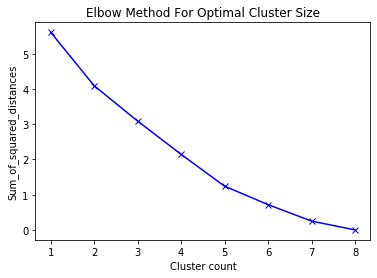

In [8]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 9 and capture inertia
K = range(1,9)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(genre_matrix)
    sosd.append(km.inertia_)
    
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()


From the graph above, it appears that its 'elbow' is most evident at a cluster count of 2, or 5 (it is difficult to tell here). An inspection of the feature names in Step One tells us that there is over two clear distinct genres in these ten films (e.g. comedy, drama and crime) so 2 clusters is likely to not suffice. Hence we'll conclude that 5 is the optimal cluster count for the next step.

**Step Four: Adjust clusters to meet theoretical optimal count of 5**

In [9]:
#Split data into 5 clusters
kmeans = KMeans(n_clusters=5).fit(genre_matrix)

#get Cluster labels.
clusters=kmeans.labels_

#Print cluster label and film titles under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    
    for i in genre_df.index:
        if ( clusters[i] == group):
            print(film_list[i])


Group :  0 
-------------------
Little Women

Group :  1 
-------------------
Once Upon a Time In Hollywood
Marriage Story
Dolemite is my Name

Group :  2 
-------------------
The Irishman

Group :  3 
-------------------
Pain & Glory
A Beautiful Day in the Neighbourhood

Group :  4 
-------------------
Parasite
Knives Out
Hustlers


If we were to hypothesise what happened above, Parasite and Knives Out are in the same group because they share nearly all the same genres; which is significant for at least 5 genres. Hustlers also shares a lot with them. Once Upon a Time In Hollywood follows a similar trend with Marriage Story and Dolemite is my Name, however with only 2 or 3 genres. Likewise for Group 3, albeit each are 'only' a drama. The Irishman and Little Women are each separate, perhaps because each have a unique genre (epic and each of melodrama, historical drama and youth novel respectively). Overall though, k means clustering splits the films up decently when k = 5. 